In [146]:
import numpy as np
import matplotlib.pyplot as plt

Execute o k-means com k=2 para a seguinte base. 
Após, calcule o SSE e o SSWC do agrupamento.

In [202]:
def distance_calc(x,y,c1,c2):

    dist_c1 = np.sqrt((x-c1[0])**2 + (y-c1[1])**2)
    dist_c2 = np.sqrt((x-c2[0])**2 + (y-c2[1])**2)
    
    return dist_c1, dist_c2


def choose_cluster(dist_c1, dist_c2):

    cluster_1 = np.array([])
    cluster_2 = np.array([])
    
    for i in range(len(x)):
        
        if dist_c1[i] < dist_c2[i]:
            cluster_1 = np.append(cluster_1, i)
        else:
            cluster_2 = np.append(cluster_2, i)

    print('cluster 1: %s' % cluster_1)
    print('cluster 2: %s' % cluster_2)
    print('')
    return cluster_1, cluster_2


def new_cluster(cluster_1, cluster_2):
    
    new_c1 = np.array([np.average([x[int(i)] for i in cluster_1]), np.average([y[int(i)] for i in cluster_1])])
    new_c2 = np.array([np.average([x[int(i)] for i in cluster_2]), np.average([y[int(i)] for i in cluster_2])])
    
    print('new centroid 1: %s' % new_c1)
    print('new centroid 2: %s' % new_c2)
    print('-------------------')
    return new_c1, new_c2


def sse_calc(dist_c1, dist_c2):
    
    sse = np.sum(np.minimum(dist_c1, dist_c2)**2)
    print('SSE:%.2f' % sse)
    return sse


def sswc_calc(dist_c1, dist_c2):
     
    sswc = np.average(np.absolute((dist_c2-dist_c1))/np.maximum(dist_c1, dist_c2))
    print('SSWC:%.2f' % sswc)
    return sswc

iteraction 0
cluster 1: [0. 2. 3.]
cluster 2: [1. 4. 5.]

new centroid 1: [2.         1.33333333]
new centroid 2: [2.66666667 3.33333333]
-------------------
SSE:23.00
SSWC:0.36
iteraction 1
cluster 1: [0. 1. 2. 3.]
cluster 2: [4. 5.]

new centroid 1: [1.75 1.5 ]
new centroid 2: [3.5 4. ]
-------------------
SSE:6.89
SSWC:0.56
iteraction 2
cluster 1: [0. 1. 2. 3.]
cluster 2: [4. 5.]

new centroid 1: [1.75 1.5 ]
new centroid 2: [3.5 4. ]
-------------------
SSE:4.25
SSWC:0.72
Stoped in iteraction 3


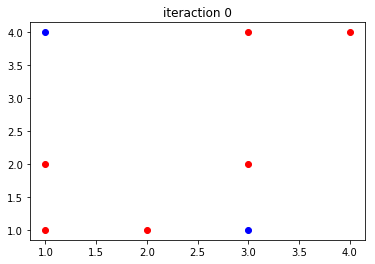

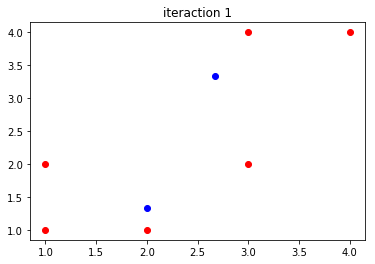

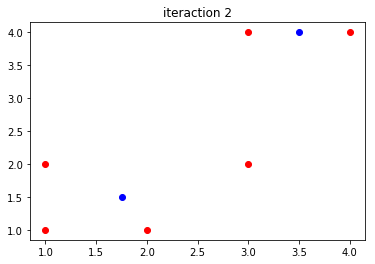

In [203]:
x = np.array([1,1,2,3,3,4])
y = np.array([1,2,1,2,4,4])
c1 = np.array([3,1])
c2 = np.array([1,4])
i = 0

while True:
    print('iteraction %i' %i)
    
    plt.figure()
    plt.plot(x, y, 'ro')
    plt.plot(c1[0], c1[1], 'bo')
    plt.plot(c2[0], c2[1], 'bo')
    plt.title('iteraction %i' %i)
    
    dist_c1, dist_c2 = distance_calc(x,y,c1,c2)
    cluster_1, cluster_2 = choose_cluster(dist_c1, dist_c2)
    new_c1, new_c2 = new_cluster(cluster_1, cluster_2)
    
    i+=1
    
    sse = sse_calc(dist_c1, dist_c2)
    sswc = sswc_calc(dist_c1, dist_c2)
    
    if np.array_equal(c1,new_c1) and np.array_equal(c2,new_c2):
        print('Stoped in iteraction %i' %i)
        break
    
    c1, c2 = new_c1, new_c2